In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('inputs/USDJPY_H1.csv', sep='\t', names=('date', 'time', 'open', 'high', 'low', 'close'), usecols=[0, 1, 2, 3, 4, 5], skiprows=1)
data['datetime'] = pd.to_datetime(data['date']  + ' ' + data['time'])
data.drop(['date', 'time'], axis=1, inplace=True)
data

,open,high,low,close,datetime
0,107.547,107.567,107.455,107.481,2020-04-01 00:00:00
1,107.481,107.760,107.481,107.758,2020-04-01 01:00:00
2,107.756,107.757,107.401,107.506,2020-04-01 02:00:00
3,107.506,107.582,107.252,107.488,2020-04-01 03:00:00
4,107.488,107.732,107.425,107.708,2020-04-01 04:00:00
...,...,...,...,...,...
6764,109.087,109.176,109.059,109.103,2021-05-04 03:00:00
6765,109.104,109.232,109.104,109.226,2021-05-04 04:00:00
6766,109.226,109.263,109.199,109.226,2021-05-04 05:00:00
6767,109.226,109.256,109.215,109.256,2021-05-04 06:00:00


In [3]:
# all_data = pd.merge(data, ni225, on='datetime', suffixes=['', '_ni225']).drop(['date_ni225', 'time_ni225'], axis=1)
all_data = data.copy()
all_data

,open,high,low,close,datetime
0,107.547,107.567,107.455,107.481,2020-04-01 00:00:00
1,107.481,107.760,107.481,107.758,2020-04-01 01:00:00
2,107.756,107.757,107.401,107.506,2020-04-01 02:00:00
3,107.506,107.582,107.252,107.488,2020-04-01 03:00:00
4,107.488,107.732,107.425,107.708,2020-04-01 04:00:00
...,...,...,...,...,...
6764,109.087,109.176,109.059,109.103,2021-05-04 03:00:00
6765,109.104,109.232,109.104,109.226,2021-05-04 04:00:00
6766,109.226,109.263,109.199,109.226,2021-05-04 05:00:00
6767,109.226,109.256,109.215,109.256,2021-05-04 06:00:00


In [4]:
# extract features from date
all_data['day'] = [i.day for i in all_data['datetime']]
all_data['month'] = [i.month for i in all_data['datetime']]
all_data['year'] = [i.year for i in all_data['datetime']]
all_data['day_of_week'] = [i.dayofweek for i in all_data['datetime']]
all_data['day_of_year'] = [i.dayofyear for i in all_data['datetime']]

all_data['hour'] = [i.hour for i in all_data['datetime']]
all_data['minute'] = [i.minute for i in all_data['datetime']]

all_data

,open,high,low,close,datetime,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.567,107.455,107.481,2020-04-01 00:00:00,1,4,2020,2,92,0,0
1,107.481,107.760,107.481,107.758,2020-04-01 01:00:00,1,4,2020,2,92,1,0
2,107.756,107.757,107.401,107.506,2020-04-01 02:00:00,1,4,2020,2,92,2,0
3,107.506,107.582,107.252,107.488,2020-04-01 03:00:00,1,4,2020,2,92,3,0
4,107.488,107.732,107.425,107.708,2020-04-01 04:00:00,1,4,2020,2,92,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6764,109.087,109.176,109.059,109.103,2021-05-04 03:00:00,4,5,2021,1,124,3,0
6765,109.104,109.232,109.104,109.226,2021-05-04 04:00:00,4,5,2021,1,124,4,0
6766,109.226,109.263,109.199,109.226,2021-05-04 05:00:00,4,5,2021,1,124,5,0
6767,109.226,109.256,109.215,109.256,2021-05-04 06:00:00,4,5,2021,1,124,6,0


In [5]:
# dataset = all_data[['open', 'high', 'low', 'close', 'tickvol', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute', 'open_ni225', 'high_ni225', 'low_ni225', 'close_ni225', 'tickvol_ni225']]
dataset = all_data[['open', 'high', 'low', 'close', 'day', 'month', 'year', 'day_of_week', 'day_of_year', 'hour', 'minute']]
dataset


,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,minute
0,107.547,107.567,107.455,107.481,1,4,2020,2,92,0,0
1,107.481,107.760,107.481,107.758,1,4,2020,2,92,1,0
2,107.756,107.757,107.401,107.506,1,4,2020,2,92,2,0
3,107.506,107.582,107.252,107.488,1,4,2020,2,92,3,0
4,107.488,107.732,107.425,107.708,1,4,2020,2,92,4,0
...,...,...,...,...,...,...,...,...,...,...,...
6764,109.087,109.176,109.059,109.103,4,5,2021,1,124,3,0
6765,109.104,109.232,109.104,109.226,4,5,2021,1,124,4,0
6766,109.226,109.263,109.199,109.226,4,5,2021,1,124,5,0
6767,109.226,109.256,109.215,109.256,4,5,2021,1,124,6,0


In [6]:
dataset['y'] = dataset['high'].shift(-1)
dataset[['y', 'high']]

,y,high
0,107.760,107.567
1,107.757,107.760
2,107.582,107.757
3,107.732,107.582
4,107.936,107.732
...,...,...
6764,109.232,109.176
6765,109.263,109.232
6766,109.256,109.263
6767,109.295,109.256


In [7]:
for i in range(1, 13):
    dataset['shift%s'%i] = dataset['high'].shift(i)

dataset['sma5'] = dataset['high'].rolling(5).mean()
dataset['sma15'] = dataset['high'].rolling(15).mean()
dataset['H1_high'] = dataset['high'].rolling(25).max()
dataset['H1_low'] = dataset['low'].rolling(25).min()
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15,H1_high,H1_low
0,107.547,107.567,107.455,107.481,1,4,2020,2,92,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,107.481,107.760,107.481,107.758,1,4,2020,2,92,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,107.756,107.757,107.401,107.506,1,4,2020,2,92,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.506,107.582,107.252,107.488,1,4,2020,2,92,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,107.488,107.732,107.425,107.708,1,4,2020,2,92,4,...,NaN,NaN,NaN,NaN,NaN,NaN,107.6796,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,109.087,109.176,109.059,109.103,4,5,2021,1,124,3,...,109.133,109.154,109.100,109.128,109.384,109.521,109.1210,109.218533,109.696,108.894
6765,109.104,109.232,109.104,109.226,4,5,2021,1,124,4,...,109.109,109.133,109.154,109.100,109.128,109.384,109.1434,109.197933,109.696,108.894
6766,109.226,109.263,109.199,109.226,4,5,2021,1,124,5,...,109.116,109.109,109.133,109.154,109.100,109.128,109.1710,109.183000,109.696,108.894
6767,109.226,109.256,109.215,109.256,4,5,2021,1,124,6,...,109.120,109.116,109.109,109.133,109.154,109.100,109.2076,109.165333,109.696,108.894


In [8]:
dataset = dataset[100:-1]
dataset

,open,high,low,close,day,month,year,day_of_week,day_of_year,hour,...,shift7,shift8,shift9,shift10,shift11,shift12,sma5,sma15,H1_high,H1_low
100,109.010,109.085,108.827,108.886,7,4,2020,1,98,4,...,109.067,109.086,109.192,109.149,109.176,109.105,109.1924,109.163800,109.379,108.748
101,108.886,108.948,108.713,108.922,7,4,2020,1,98,5,...,109.249,109.067,109.086,109.192,109.149,109.176,109.1342,109.151333,109.379,108.713
102,108.922,108.950,108.738,108.779,7,4,2020,1,98,6,...,109.239,109.249,109.067,109.086,109.192,109.149,109.0690,109.141533,109.379,108.713
103,108.780,108.838,108.668,108.764,7,4,2020,1,98,7,...,109.239,109.239,109.249,109.067,109.086,109.192,108.9904,109.123733,109.379,108.668
104,108.761,108.861,108.716,108.829,7,4,2020,1,98,8,...,109.276,109.239,109.239,109.249,109.067,109.086,108.9364,109.102733,109.379,108.668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,109.077,109.111,109.058,109.087,4,5,2021,1,124,2,...,109.154,109.100,109.128,109.384,109.521,109.487,109.1090,109.249600,109.696,108.894
6764,109.087,109.176,109.059,109.103,4,5,2021,1,124,3,...,109.133,109.154,109.100,109.128,109.384,109.521,109.1210,109.218533,109.696,108.894
6765,109.104,109.232,109.104,109.226,4,5,2021,1,124,4,...,109.109,109.133,109.154,109.100,109.128,109.384,109.1434,109.197933,109.696,108.894
6766,109.226,109.263,109.199,109.226,4,5,2021,1,124,5,...,109.116,109.109,109.133,109.154,109.100,109.128,109.1710,109.183000,109.696,108.894


In [9]:
dataset[['y', 'high']]

,y,high
100,108.948,109.085
101,108.950,108.948
102,108.838,108.950
103,108.861,108.838
104,108.973,108.861
...,...,...
6763,109.176,109.111
6764,109.232,109.176
6765,109.263,109.232
6766,109.256,109.263


In [10]:
dataset.isnull().any()

open           False
high           False
low            False
close          False
day            False
month          False
year           False
day_of_week    False
day_of_year    False
hour           False
minute         False
y              False
shift1         False
shift2         False
shift3         False
shift4         False
shift5         False
shift6         False
shift7         False
shift8         False
shift9         False
shift10        False
shift11        False
shift12        False
sma5           False
sma15          False
H1_high        False
H1_low         False
dtype: bool

In [11]:
X = dataset.drop(['y'], axis=1)
y = dataset['y']

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [13]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True)

# params = {'max_depth': [5, 7, 9, 11], 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [100, 500]}
params = {'objective': ['reg:squarederror'], 'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50)), 'learning_rate': [0.1, 0.01, 0.001]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}
# params = {'max_depth': [5, 6, 7], 'random_state': [0], 'n_estimators': [500], 'learning_rate': [.03, .05, .07], 'min_child_weight': [4]}
# params = {'max_depth': list(range(2, 10)), 'random_state': [0], 'n_estimators': list(range(50, 200, 50))}

# XGBoost
xgb = XGBRegressor()

reg_cv_xgb = GridSearchCV(xgb, params, cv=folds, return_train_score=True, verbose=100)
reg_cv_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.9s
[CV 2/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.4s
[CV 3/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.4s
[CV 4/5; 1/72] START learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 1/72] END learning_rate=0.1, max_depth=2, n_estimators=50, objective=reg:squarederro

[CV 4/5; 7/72] END learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.5s
[CV 5/5; 7/72] START learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 7/72] END learning_rate=0.1, max_depth=4, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.5s
[CV 1/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 8/72] END learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   1.3s
[CV 2/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2/5; 8/72] END learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   1.3s
[CV 3/5; 8/72] START learning_rate=0.1, max_depth=4, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 3/5; 8/72] END 

[CV 3/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   1.6s
[CV 4/5; 14/72] START learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 4/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   1.7s
[CV 5/5; 14/72] START learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 5/5; 14/72] END learning_rate=0.1, max_depth=6, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   1.7s
[CV 1/5; 15/72] START learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 1/5; 15/72] END learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   2.8s
[CV 2/5; 15/72] START learning_rate=0.1, max_depth=6, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 2/5;

[CV 2/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   4.2s
[CV 3/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 3/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   5.7s
[CV 4/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 4/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   3.6s
[CV 5/5; 21/72] START learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 5/5; 21/72] END learning_rate=0.1, max_depth=8, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   5.2s
[CV 1/5; 22/72] START learning_rate=0.1, max_depth=9, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 

[CV 5/5; 27/72] END learning_rate=0.01, max_depth=2, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   1.1s
[CV 1/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 2/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 3/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 28/72] END learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 4/5; 28/72] START learning_rate=0.01, max_depth=3, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5

[CV 3/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 4/5; 34/72] START learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 5/5; 34/72] START learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 34/72] END learning_rate=0.01, max_depth=5, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 1/5; 35/72] START learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 35/72] END learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 2/5; 35/72] START learning_rate=0.01, max_depth=5, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2

[CV 1/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 2/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 2/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 3/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 3/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 4/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 4/5; 41/72] END learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 5/5; 41/72] START learning_rate=0.01, max_depth=7, n_estimators=100, objective=reg:squarederror, random_state=0


[CV 4/5; 47/72] END learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 5/5; 47/72] START learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 5/5; 47/72] END learning_rate=0.01, max_depth=9, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 1/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 1/5; 48/72] END learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   1.1s
[CV 2/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 2/5; 48/72] END learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   1.1s
[CV 3/5; 48/72] START learning_rate=0.01, max_depth=9, n_estimators=150, objective=reg:squarederror, random_state=0


[CV 2/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   0.8s
[CV 3/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 3/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   0.9s
[CV 4/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 4/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 5/5; 54/72] START learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0
[CV 5/5; 54/72] END learning_rate=0.001, max_depth=3, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   0.7s
[CV 1/5; 55/72] START learning_rate=0.001, max_depth=4, n_estimators=50, objective=reg:squarederror, random_s

[CV 5/5; 60/72] END learning_rate=0.001, max_depth=5, n_estimators=150, objective=reg:squarederror, random_state=0; total time=   0.9s
[CV 1/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 1/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 2/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 2/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.3s
[CV 3/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 3/5; 61/72] END learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.2s
[CV 4/5; 61/72] START learning_rate=0.001, max_depth=6, n_estimators=50, objective=reg:squarederror, random_state=0

[CV 3/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.2s
[CV 4/5; 67/72] START learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 4/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.2s
[CV 5/5; 67/72] START learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0
[CV 5/5; 67/72] END learning_rate=0.001, max_depth=8, n_estimators=50, objective=reg:squarederror, random_state=0; total time=   0.2s
[CV 1/5; 68/72] START learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state=0
[CV 1/5; 68/72] END learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state=0; total time=   0.4s
[CV 2/5; 68/72] START learning_rate=0.001, max_depth=8, n_estimators=100, objective=reg:squarederror, random_state

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                         

In [15]:
print(reg_cv_xgb.best_params_)
y_pred = reg_cv_xgb.predict(X_val)
y_pred

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'objective': 'reg:squarederror', 'random_state': 0}


array([105.4612  , 105.43864 , 105.4237  , ..., 109.220764, 109.218155,
       109.242096], dtype=float32)

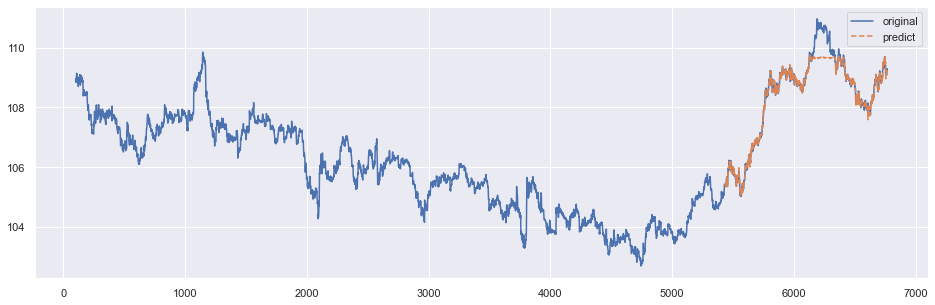

In [17]:
y_ = np.concatenate([np.array([None for i in range(len(y_train))]) , y_pred])
y_ = pd.DataFrame(y_, index=X.index)

plt.figure(figsize=(16,5))
plt.plot(y, label='original')
plt.plot(y_, '--', label='predict')
plt.legend()

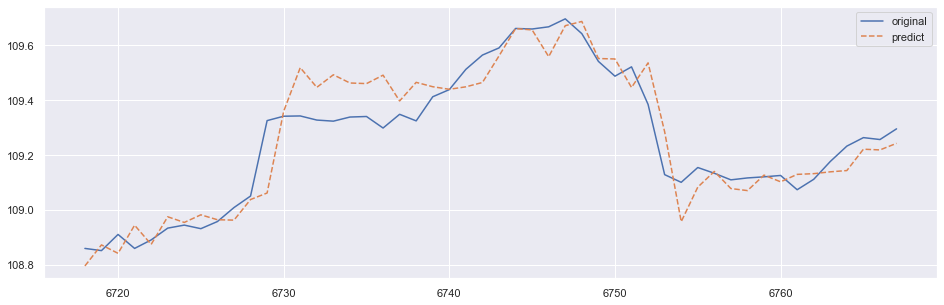

In [18]:
plt.figure(figsize=(16,5))
plt.plot(y[-50:], label='original')
plt.plot(y_[-50:], '--', label='predict')
plt.legend()

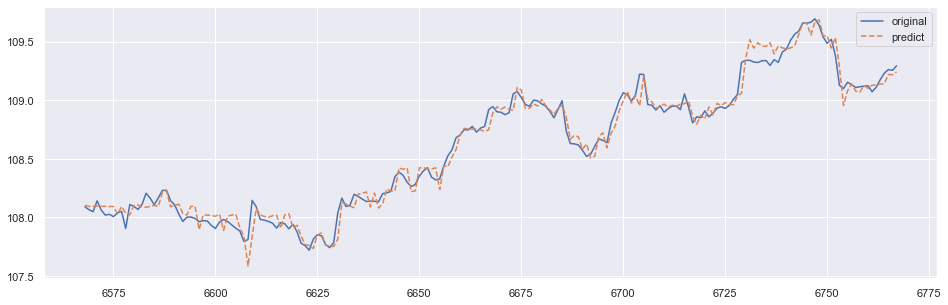

In [19]:
plt.figure(figsize=(16,5))
plt.plot(y[-200:], label='original')
plt.plot(y_[-200:], '--', label='predict')
plt.legend()

In [ ]:
import pickle

filename='model_H1.pkl'
pickle.dump(reg_cv_xgb.best_estimator_, open(filename, 'wb'))